<a href="https://colab.research.google.com/github/ankit72890/CatVsDog/blob/main/CatVsDog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install -q kaggle

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/base_command.py", line 179, in exc_logging_wrapper
    status = run_func(*args)
             ^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/req_command.py", line 67, in wrapper
    return func(self, options, args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/commands/install.py", line 324, in run
    session = self.get_default_session(options)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/index_command.py", line 71, in get_default_session
    self._session = self.enter_context(self._build_session(options))
                                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/index_command.py", line 100, in _build_session
    session = PipSession(
              ^^^^^^^^^

In [4]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ankit7289","key":"39333b1468a196c0bc4c6d1a45576492"}'}

In [5]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [7]:
!kaggle datasets download -d tongpython/cat-and-dog

Dataset URL: https://www.kaggle.com/datasets/tongpython/cat-and-dog
License(s): CC0-1.0
 76% 166M/218M [00:00<00:00, 804MB/s] 
100% 218M/218M [00:00<00:00, 513MB/s]


In [8]:
import zipfile
with zipfile.ZipFile('/content/cat-and-dog.zip','r') as zip_ref:
  zip_ref.extractall('/content')

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen=ImageDataGenerator(rescale=1/255,validation_split=0.2)
train_generator=datagen.flow_from_directory('/content/training_set',target_size=(224,224),batch_size=32,class_mode='binary',subset='training')
val_generator=datagen.flow_from_directory('/content/training_set',target_size=(224,224),batch_size=32,class_mode='binary',subset='validation')

Found 6404 images belonging to 1 classes.
Found 1601 images belonging to 1 classes.


In [10]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D,Dense
base_model=MobileNetV2(weights='imagenet',include_top=False,input_shape=(224,224,3))
base_model.trainable=False
model=Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(1,activation='sigmoid')
])
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(train_generator,epochs=2)

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/2


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


201/201 ━━━━━━━━━━━━━━━━━━━━ 268s 1s/step - accuracy: 0.9415 - loss: 0.1082
Epoch 2/2
201/201 ━━━━━━━━━━━━━━━━━━━━ 261s 1s/step - accuracy: 1.0000 - loss: 9.6512e-04


In [11]:
import tensorflow as tf
base_model.trainable=True
model.compile(optimizer=tf.keras.optimizers.Adam(1e-5),loss='binary_crossentropy',metrics=['accuracy'])
model.fit(train_generator,epochs=2)

Epoch 1/2
201/201 ━━━━━━━━━━━━━━━━━━━━ 1231s 6s/step - accuracy: 1.0000 - loss: 1.7794e-04
Epoch 2/2
201/201 ━━━━━━━━━━━━━━━━━━━━ 1173s 6s/step - accuracy: 1.0000 - loss: 3.9203e-05


In [12]:
model.save('mobilenet_cats_dogs.h5')
import tensorflow as tf
loaded_model=tf.keras.models.load_model('mobilenet_cats_dogs.h5')

51/51 ━━━━━━━━━━━━━━━━━━━━ 60s 1s/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


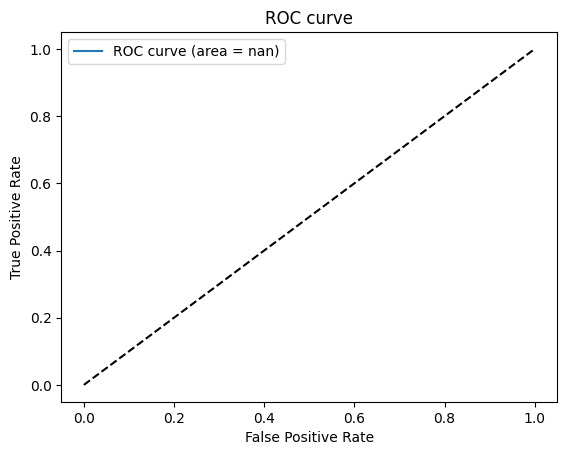

In [13]:
from sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as plt
y_pred=loaded_model.predict(val_generator)
fpr,tpr,_=roc_curve(val_generator.classes,y_pred)
roc_auc=auc(fpr,tpr)
plt.plot(fpr,tpr,label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [20]:
from google.colab import files
uploaded=files.upload()
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import numpy as np
img_path='loaded.jpg'
img=image.load_img(img_path,target_size=(224,224))
img_array=image.img_to_array(img)
img_array=np.expand_dims(img_array,axis=0)
img_array=preprocess_input(img_array)
prediction=loaded_model.predict(img_array)
print("Prediction : ",prediction)
if prediction[0][0]>0.5:
  print('Dog')
else:
  print('cat')


Saving loaded.jpg to loaded.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
Prediction :  [[4.9915197e-05]]
cat
